Tu wczytam pliki csv z danymi imsms i russian dataset a następnie złożę je do jednego wspólnego pliku csv

In [1]:
import pandas as pd

# Wczytanie plików
imsms = pd.read_csv('/home/PaulinaSk/mgr/bubabiba/pojedyncze_cleaned_paired_imsms.csv')
# ru = pd.read_csv('/home/PaulinaSk/mgr/russian_dataset/processed_ru.csv')
ru = pd.read_csv('/home/PaulinaSk/mgr/russian_dataset/subset_ru.csv')

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
ru["gender"] = ru["gender"].astype(str).str.lower()
ru["disease"] = ru["disease"].astype(str).str.lower()

In [3]:
ru = ru[ru["disease"].isin(["depression", "healthy"])]

In [4]:
# imsms.columns

ru.columns

Index(['study_name', 'sample_id', 'age', 'gender', 'disease', 'CES-D', 'GAD-7',
       'HAMD-17', 'BMI', 'Size, Gbp.', 'Number of reads', 'Number of contigs',
       'Assembly length, Mbp.', 'N50, b.p.', 'Maximum contig length, kbp.',
       'NCBI_accession'],
      dtype='object')

In [5]:
common_cols = ['study_name', 'sample_id', 'age', 'gender', 'disease', 'BMI', 'NCBI_accession']

# unikalne kolumny w każdym pliku
imsms_unique_cols = [col for col in imsms.columns if col not in common_cols]
russia_unique_cols = [col for col in ru.columns if col not in common_cols]

# jeśli któreś kolumny unikalne nie istnieją, można je pominąć
imsms_unique_cols = [col for col in imsms_unique_cols if col in imsms.columns]
russia_unique_cols = [col for col in russia_unique_cols if col in ru.columns]

rums = pd.concat([
    imsms[common_cols + imsms_unique_cols],
    ru[common_cols + russia_unique_cols]
], ignore_index=True)

# rums.to_csv('final_metadata.csv', index=False)


In [6]:
# rums = pd.read_csv("final_metadata.csv")

rums

,study_name,sample_id,age,gender,disease,BMI,NCBI_accession,subject_id,body_site,antibiotics_current_use,...,collection_method,CES-D,GAD-7,HAMD-17,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,iMSMS_2022,s_11326.Q1.71702.0010.6.22.16,53.0,male,depression,25.014172,ERR3473323,s_71702-0010,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iMSMS_2022,s_11326.Q.76502.0008.N.A,52.0,male,healthy,25.198822,ERR6997210,s_76502-0008,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iMSMS_2022,s_11326.Q1.71702.0017.8.15.16,48.0,female,depression,29.927439,ERR3473331,s_71702-0017,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iMSMS_2022,s_11326.Q.71702.0107.2017.08.16,48.0,female,healthy,29.319856,ERR6996469,s_71702-0107,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iMSMS_2022,s_11326.Q1.71702.0033.10.4.16,43.0,female,depression,22.118712,ERR3473346,s_71702-0033,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,russian_data,PwD_33,25.0,female,depression,22.000000,SRR16681855,NaN,NaN,NaN,...,NaN,26.0,10.0,20.0,4.771103,75002340.0,512000.0,450.43,2036.0,622.86
230,russian_data,PwD_34,23.0,female,depression,21.000000,SRR16681854,NaN,NaN,NaN,...,NaN,39.0,9.0,26.0,4.801333,75477564.0,527743.0,430.23,1689.0,444.28
231,russian_data,PwD_35,35.0,male,depression,24.000000,SRR16681853,NaN,NaN,NaN,...,NaN,30.0,10.0,21.0,5.244426,82443002.0,782814.0,581.96,1192.0,549.01
232,russian_data,PwD_36,19.0,female,depression,20.000000,SRR16681851,NaN,NaN,NaN,...,NaN,42.0,9.0,23.0,5.309179,83461298.0,456214.0,438.71,2630.0,889.51


In [7]:
rums["gender"] = rums["gender"].astype(str).str.lower()
rums["disease"] = rums["disease"].astype(str).str.lower()


# rums["gender"] = rums["gender"].replace({
#     "1": "male",
#     "0": "female"
# })


In [8]:
rums[rums['study_name'] == "russian_data"]

,study_name,sample_id,age,gender,disease,BMI,NCBI_accession,subject_id,body_site,antibiotics_current_use,...,collection_method,CES-D,GAD-7,HAMD-17,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
176,russian_data,HC_1,45.0,male,healthy,28.0,SRR15966663,NaN,NaN,NaN,...,NaN,17.0,10.0,8.0,8.978004,77234300.0,611321.0,475.23,1415.0,548.45
177,russian_data,HC_2,44.0,male,healthy,30.0,SRR15966662,NaN,NaN,NaN,...,NaN,10.0,4.0,5.0,8.037045,68444164.0,547126.0,414.53,1232.0,648.94
178,russian_data,HC_3,18.0,male,healthy,NaN,SRR15966661,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,8.031857,67588818.0,235013.0,230.52,2571.0,421.60
179,russian_data,HC_4,33.0,male,healthy,26.0,SRR15966660,NaN,NaN,NaN,...,NaN,1.0,3.0,4.0,7.804608,66208170.0,343919.0,326.67,2287.0,525.38
180,russian_data,HC_5,24.0,female,healthy,22.0,SRR15966659,NaN,NaN,NaN,...,NaN,11.0,2.0,0.0,7.530154,64400800.0,230896.0,221.66,2952.0,488.86
181,russian_data,HC_6,24.0,female,healthy,22.0,SRR15966658,NaN,NaN,NaN,...,NaN,9.0,3.0,3.0,7.549139,63538790.0,500259.0,395.22,1503.0,606.80
182,russian_data,HC_7,24.0,male,healthy,23.0,SRR15966656,NaN,NaN,NaN,...,NaN,5.0,1.0,3.0,7.246634,61801170.0,417686.0,326.72,1381.0,685.30
183,russian_data,HC_8,29.0,female,healthy,19.0,SRR15966655,NaN,NaN,NaN,...,NaN,6.0,2.0,2.0,7.470154,65685486.0,408586.0,349.88,1949.0,591.12
184,russian_data,HC_9,25.0,female,healthy,18.0,SRR15966654,NaN,NaN,NaN,...,NaN,5.0,3.0,3.0,6.978883,62181548.0,271082.0,236.37,1969.0,328.64
185,russian_data,HC_10,25.0,female,healthy,23.0,SRR15966653,NaN,NaN,NaN,...,NaN,0.0,2.0,3.0,7.356419,65674262.0,484405.0,373.48,1327.0,369.46


In [9]:
rums

,study_name,sample_id,age,gender,disease,BMI,NCBI_accession,subject_id,body_site,antibiotics_current_use,...,collection_method,CES-D,GAD-7,HAMD-17,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,iMSMS_2022,s_11326.Q1.71702.0010.6.22.16,53.0,male,depression,25.014172,ERR3473323,s_71702-0010,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iMSMS_2022,s_11326.Q.76502.0008.N.A,52.0,male,healthy,25.198822,ERR6997210,s_76502-0008,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iMSMS_2022,s_11326.Q1.71702.0017.8.15.16,48.0,female,depression,29.927439,ERR3473331,s_71702-0017,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iMSMS_2022,s_11326.Q.71702.0107.2017.08.16,48.0,female,healthy,29.319856,ERR6996469,s_71702-0107,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iMSMS_2022,s_11326.Q1.71702.0033.10.4.16,43.0,female,depression,22.118712,ERR3473346,s_71702-0033,stool,no,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,russian_data,PwD_33,25.0,female,depression,22.000000,SRR16681855,NaN,NaN,NaN,...,NaN,26.0,10.0,20.0,4.771103,75002340.0,512000.0,450.43,2036.0,622.86
230,russian_data,PwD_34,23.0,female,depression,21.000000,SRR16681854,NaN,NaN,NaN,...,NaN,39.0,9.0,26.0,4.801333,75477564.0,527743.0,430.23,1689.0,444.28
231,russian_data,PwD_35,35.0,male,depression,24.000000,SRR16681853,NaN,NaN,NaN,...,NaN,30.0,10.0,21.0,5.244426,82443002.0,782814.0,581.96,1192.0,549.01
232,russian_data,PwD_36,19.0,female,depression,20.000000,SRR16681851,NaN,NaN,NaN,...,NaN,42.0,9.0,23.0,5.309179,83461298.0,456214.0,438.71,2630.0,889.51


In [10]:
rums[rums["disease"]=="depression"].shape, rums[rums["disease"]=="healthy"].shape

((108, 52), (126, 52))

In [11]:
has_depression = rums[rums["disease"].str.contains("depression", case=False, na=False)]
no_depression = rums[~rums["disease"].str.contains("depression", case=False, na=False)]

print(f"Liczba osób z depresją: {len(has_depression)}")
print(f"Liczba osób bez depresji: {len(no_depression)}")

Liczba osób z depresją: 108
Liczba osób bez depresji: 126


## Pathabundance

In [12]:
import pandas as pd
import numpy as np
from skbio.diversity.alpha import shannon, simpson, chao1
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from scipy.spatial.distance import pdist, squareform
from skbio import DistanceMatrix
import seaborn as sns
import matplotlib.pyplot as plt

paab = pd.read_csv("/home/PaulinaSk/mgr/Filtered_pathabundance/all_pathways.tsv", 
                   sep='\t', header=None)

/home/PaulinaSk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_1386314/3440816627.py:12: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,16

In [13]:
# bez nagłówków
# rus_paab = pd.read_csv("/home/PaulinaSk/mgr/Filtered_pathabundance/russian_pathways.tsv", 
#                    sep="\t", header=None)

# imsms_paab = pd.read_csv("/home/PaulinaSk/mgr/Filtered_pathabundance/imsms_pathways.tsv", 
#                    sep="\t", header=None)

In [14]:
# # Pierwszy wiersz (wiersz 0) to nagłówki
# new_columns = ["NCBI_accession"] + imsms_paab.iloc[0, 1:].tolist()

# # Usuń pierwszy wiersz (nagłówki)
# imsms_paab = imsms_paab[1:]

# # Ustaw nowe kolumny
# imsms_paab.columns = new_columns

# # Teraz SampleID jest zwykłą kolumną
# # Przekształć pozostałe kolumny na wartości liczbowe
# for col in imsms_paab.columns[1:]:
#     imsms_paab[col] = pd.to_numeric(imsms_paab[col], errors='coerce')

# # Sprawdź — SampleID powinno być widoczne
# print(imsms_paab.columns[:5])
# print(imsms_paab["NCBI_accession"].head())

In [15]:
# # Pierwszy wiersz (wiersz 0) to nagłówki
# new_columns = ["NCBI_accession"] + rus_paab.iloc[0, 1:].tolist()

# # Usuń pierwszy wiersz (nagłówki)
# rus_paab = rus_paab[1:]

# # Ustaw nowe kolumny
# rus_paab.columns = new_columns

# # Teraz SampleID jest zwykłą kolumną
# # Przekształć pozostałe kolumny na wartości liczbowe
# for col in rus_paab.columns[1:]:
#     rus_paab[col] = pd.to_numeric(rus_paab[col], errors='coerce')

# # Sprawdź — SampleID powinno być widoczne
# print(rus_paab.columns[:5])
# print(rus_paab["NCBI_accession"].head())

In [16]:
# imsms_paab = imsms_paab.set_index("NCBI_accession")
# rus_paab = rus_paab.set_index("NCBI_accession")

In [17]:
# ru = ru.set_index("NCBI_accession")
# imsms = imsms.set_index("NCBI_accession")

In [18]:
# imsms_paab = imsms_paab[imsms_paab.index.isin(imsms.index)]
# rus_paab = rus_paab[rus_paab.index.isin(ru.index)]

In [19]:
# def filter_prevalence(df, treshold = 0.001):
#     '''features as columns'''
#     df_binary = df.copy()
#     df_binary[df_binary>0]=1
#     df_binary_sum = df_binary.sum(axis=0)
    
#     keep_features = df_binary_sum[df_binary_sum > df.shape[0]*treshold].index
#     filtered_df = df[keep_features]
    
#     return filtered_df

# imsms_paab = filter_prevalence(imsms_paab)

# imsms_paab.shape

In [20]:
# def filter_prevalence(df, treshold = 0.001):
#     '''features as columns'''
#     df_binary = df.copy()
#     df_binary[df_binary>0]=1
#     df_binary_sum = df_binary.sum(axis=0)
    
#     keep_features = df_binary_sum[df_binary_sum > df.shape[0]*treshold].index
#     filtered_df = df[keep_features]
    
#     return filtered_df

# rus_paab = filter_prevalence(rus_paab)

# rus_paab.shape

In [21]:
# imsms_paab.shape, rus_paab.shape

Venn diagram

In [22]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib_venn import venn2

# set1 = set(rus_paab.columns)
# set2 = set(imsms_paab.columns)

# plt.figure(figsize=(6,6))
# venn2([set1, set2], set_labels=('Russian_pathways', 'iMSMS_pathways'))
# plt.title(f"Comparison between two datasets (Venn diagram)")
# plt.show()

# # Wypisanie szczegółów
# print("- Liczba ścieżek w russian:", len(set1))
# print("- Liczba ścieżek w imsms:", len(set2))
# print("- Wspólne ścieżki:", len(set1 & set2))
# print("- Unikalne w russian:", len(set1 - set2))
# print("- Unikalne w imsms:", len(set2 - set1))


In [23]:
# 'NCBI_accession' jako indeks w metadata
metadata = rums.set_index("NCBI_accession")

In [24]:
metadata.head(3)

,study_name,sample_id,age,gender,disease,BMI,subject_id,body_site,antibiotics_current_use,study_condition,...,collection_method,CES-D,GAD-7,HAMD-17,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
ERR3473323,iMSMS_2022,s_11326.Q1.71702.0010.6.22.16,53.0,male,depression,25.014172,s_71702-0010,stool,no,control,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR6997210,iMSMS_2022,s_11326.Q.76502.0008.N.A,52.0,male,healthy,25.198822,s_76502-0008,stool,no,control,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR3473331,iMSMS_2022,s_11326.Q1.71702.0017.8.15.16,48.0,female,depression,29.927439,s_71702-0017,stool,no,control,...,qtip(dry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Pierwszy wiersz (wiersz 0) to nagłówki
new_columns = ["NCBI_accession"] + paab.iloc[0, 1:].tolist()

# Usuń pierwszy wiersz (nagłówki)
paab = paab[1:]

# Ustaw nowe kolumny
paab.columns = new_columns

# Teraz SampleID jest zwykłą kolumną
# Przekształć pozostałe kolumny na wartości liczbowe
for col in paab.columns[1:]:
    paab[col] = pd.to_numeric(paab[col], errors='coerce')

# Sprawdź — SampleID powinno być widoczne
print(paab.columns[:5])
print(paab["NCBI_accession"].head())

Index(['NCBI_accession', 'UNMAPPED', 'UNINTEGRATED',
       'PWY-6609: adenine and adenosine salvage III',
       'PANTO-PWY: phosphopantothenate biosynthesis I'],
      dtype='object')
1     ERR6995544
2     ERR6995537
3    SRR16681848
4     ERR3472757
5     ERR6995188
Name: NCBI_accession, dtype: object


In [26]:
paab = paab.set_index("NCBI_accession")

paab.head()

,UNMAPPED,UNINTEGRATED,PWY-6609: adenine and adenosine salvage III,PANTO-PWY: phosphopantothenate biosynthesis I,VALSYN-PWY: L-valine biosynthesis,PWY-7238: sucrose biosynthesis II,HISTSYN-PWY: L-histidine biosynthesis,PWY-6163: chorismate biosynthesis from 3-dehydroquinate,PWY-6700: queuosine biosynthesis I (de novo),COA-PWY: coenzyme A biosynthesis I (prokaryotic),...,PWY-5647: 2-nitrobenzoate degradation I,PWY-3781: aerobic respiration I (cytochrome c),PWY-7279: aerobic respiration II (cytochrome c) (yeast),PWY6666-2: dopamine degradation,PWY-5156: superpathway of fatty acid biosynthesis II (plant),PWY-7413: dTDP-6-deoxy-&alpha;-D-allose biosynthesis,PWY-5870: ubiquinol-8 biosynthesis (late decarboxylation),PWY-5873: ubiquinol-7 biosynthesis (late decarboxylation),PWY-6891: thiazole component of thiamine diphosphate biosynthesis II,PWY-6565: superpathway of polyamine biosynthesis III
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
ERR6995544,4.868680e+04,3.349428e+04,24.942132,17.276687,16.350432,15.761768,15.227573,15.023170,14.142449,13.055099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995537,9.060537e+04,1.919202e+05,71.302210,79.509256,74.908914,35.706450,77.015866,70.603182,91.005162,77.237386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR16681848,2.587722e+06,1.173131e+07,7736.703535,4729.155286,9680.225801,12766.928557,7130.954960,8734.525190,6136.210354,6886.069486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3472757,3.084370e+04,1.947314e+04,11.411404,5.426585,11.089520,6.515046,7.931008,0.000000,6.725019,5.479399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR6995188,1.600468e+05,2.389427e+05,196.774549,118.473674,205.799941,110.822766,146.518139,163.262410,173.430933,160.220161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
metadata.shape, paab.shape

((234, 51), (3253, 512))

In [28]:
pathways = paab[paab.index.isin(metadata.index)]

pathways.shape

(234, 512)

In [29]:
# usuwanie wierszy, które mają same zera

pathways = pathways[~(pathways == 0).all(axis=1)]

sum_rows_rarefied=pathways.sum(axis=1)

pathways = pathways.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pathways.sum(axis=1).sort_values()
 

NCBI_accession
ERR6996448     1.0
SRR16681830    1.0
SRR16681858    1.0
SRR15966646    1.0
ERR6996706     1.0
              ... 
SRR15966662    1.0
ERR9814094     1.0
SRR16681824    1.0
ERR9813979     1.0
ERR3473502     1.0
Length: 233, dtype: float64

In [30]:
def filter_prevalence(df, treshold = 0.001):
    '''features as columns'''
    df_binary = df.copy()
    df_binary[df_binary>0]=1
    df_binary_sum = df_binary.sum(axis=0)
    
    keep_features = df_binary_sum[df_binary_sum > df.shape[0]*treshold].index
    filtered_df = df[keep_features]
    
    return filtered_df

pa_filtered = filter_prevalence(pathways)

pa_filtered.shape

(233, 490)

In [31]:
# Try converting all values to numeric; non-numeric become NaN
numeric_df = pa_filtered.apply(pd.to_numeric, errors='coerce')

# Check for NaN values (i.e. non-numeric)
non_numeric_mask = numeric_df.isna() & pa_filtered.notna()

if non_numeric_mask.any().any():
    print("Non-numeric values found at:")
    print(pa_filtered[non_numeric_mask])
else:
    print("All values are numeric.")

All values are numeric.


In [32]:
metadata_filtered = metadata[metadata.index.isin(pa_filtered.index)]

In [33]:
metadata_filtered.shape, pa_filtered.shape

((233, 51), (233, 490))

## Metadata Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [35]:
palette = ["darkseagreen", "darkkhaki"]

/tmp/ipykernel_1386314/4206743389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=metadata_filtered["disease"], palette=palette, order=metadata_filtered["disease"].value_counts().index)


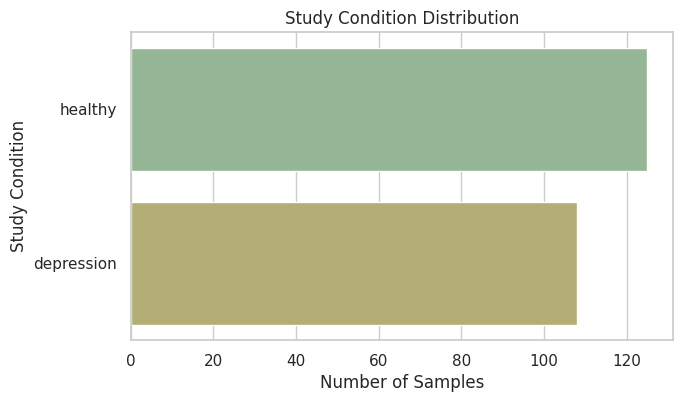

In [36]:
plt.figure(figsize=(7, 4))
sns.countplot(y=metadata_filtered["disease"], palette=palette, order=metadata_filtered["disease"].value_counts().index)
plt.title("Study Condition Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Study Condition")
plt.show()

/tmp/ipykernel_1386314/1915384870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=metadata_filtered, palette=palette)


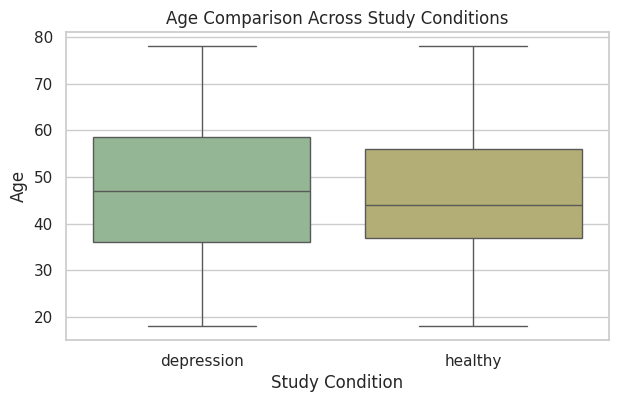

In [37]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=metadata_filtered, palette=palette)
plt.title("Age Comparison Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

/tmp/ipykernel_1386314/279771774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="BMI", data=metadata_filtered, palette=palette)


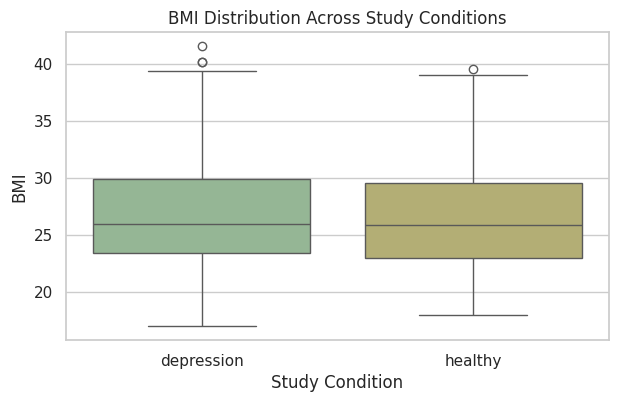

/tmp/ipykernel_1386314/279771774.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=metadata_filtered, palette=palette)


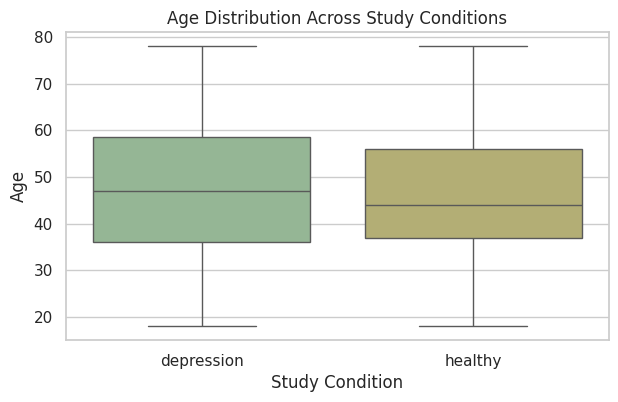

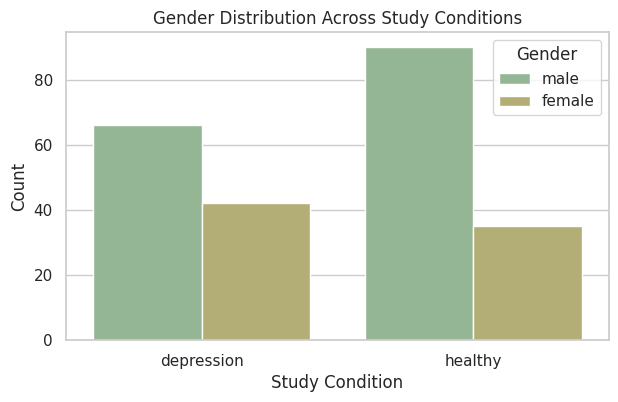

In [38]:


plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="BMI", data=metadata_filtered, palette=palette)
plt.title("BMI Distribution Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=metadata_filtered, palette=palette)
plt.title("Age Distribution Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

if "gender" in metadata_filtered.columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x="disease", hue="gender", data=metadata_filtered, palette=palette)
    plt.title("Gender Distribution Across Study Conditions")
    plt.xlabel("Study Condition")
    plt.ylabel("Count")
    plt.legend(title="Gender")
    plt.show()

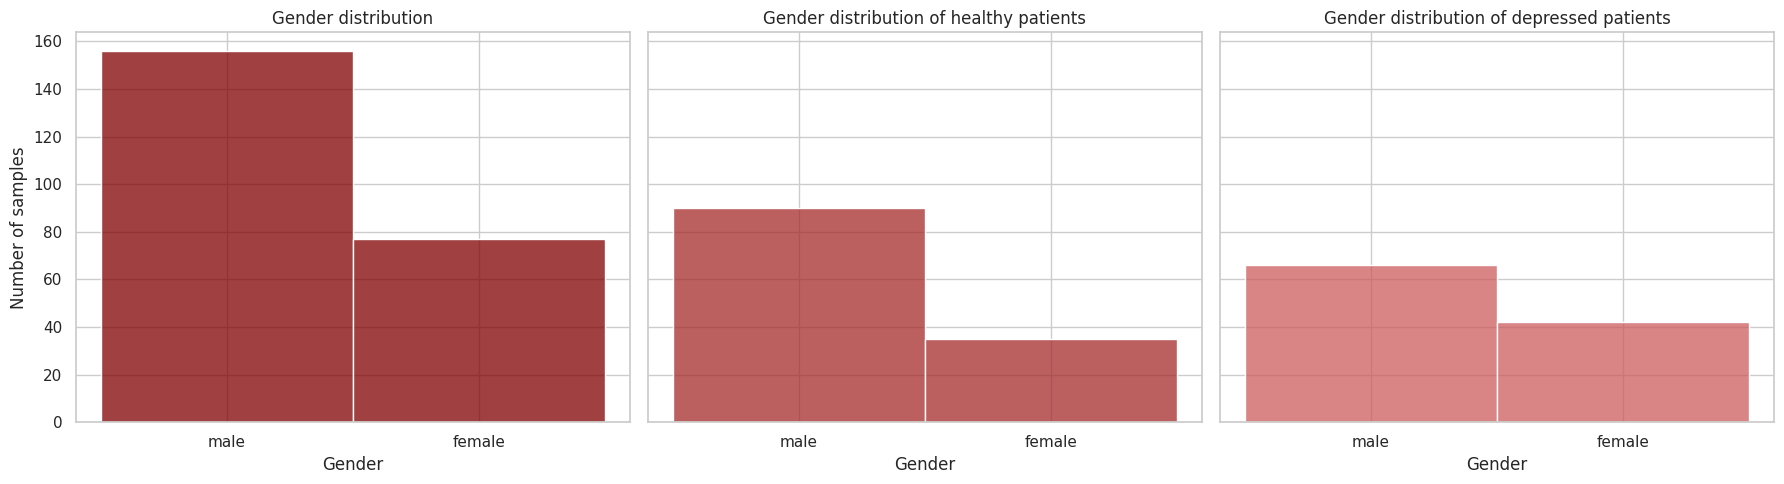

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(
    data=metadata_filtered,
    x="gender",
    bins=2,
    color="maroon",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Gender distribution")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=metadata_filtered[metadata_filtered["disease"] == "healthy"],
    x="gender",
    bins=2,
    color="brown",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Gender distribution of healthy patients")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=metadata_filtered[metadata_filtered["disease"] == "depression"],
    x="gender",
    bins=2,
    color="indianred",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Gender distribution of depressed patients")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

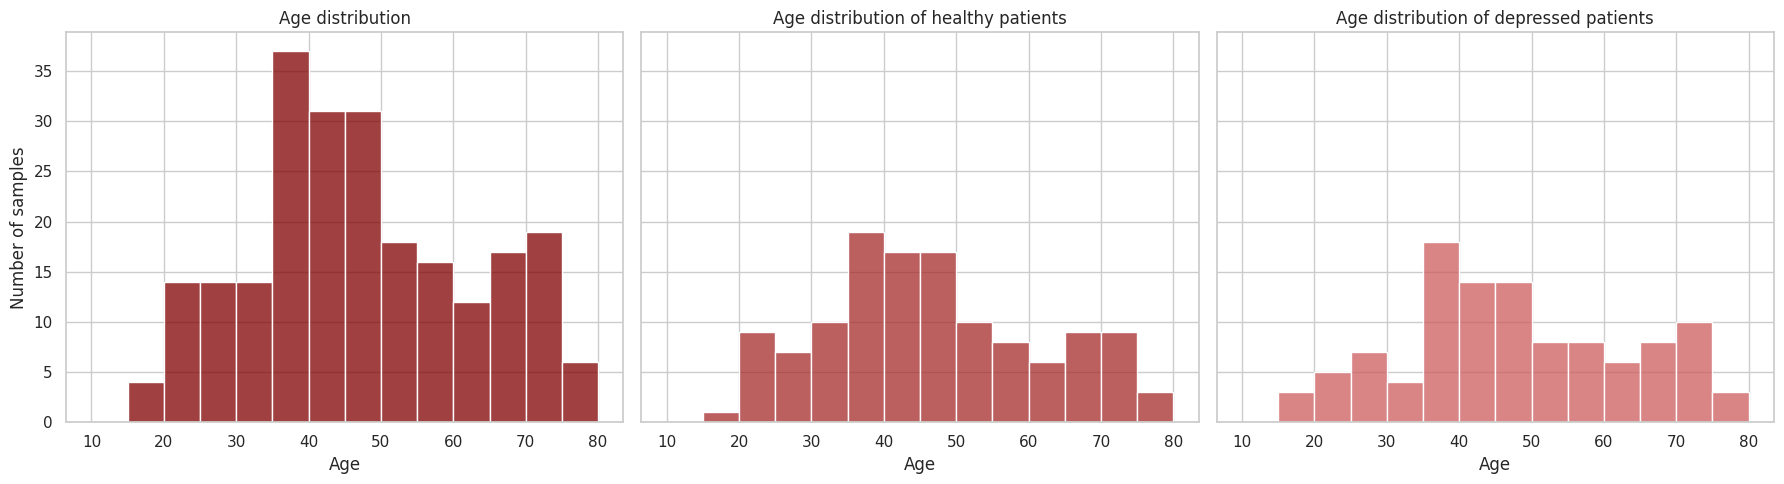

In [40]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

bins = np.arange(10, 81, 5)

sns.histplot(
    data=metadata_filtered,
    x="age",
    bins=bins,
    color="maroon",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=metadata_filtered[metadata_filtered["disease"] == "healthy"],
    x="age",
    bins=bins,
    color="brown",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of healthy patients")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=metadata_filtered[metadata_filtered["disease"] == "depression"],
    x="age",
    bins=bins,
    color="indianred",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Age distribution of depressed patients")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()


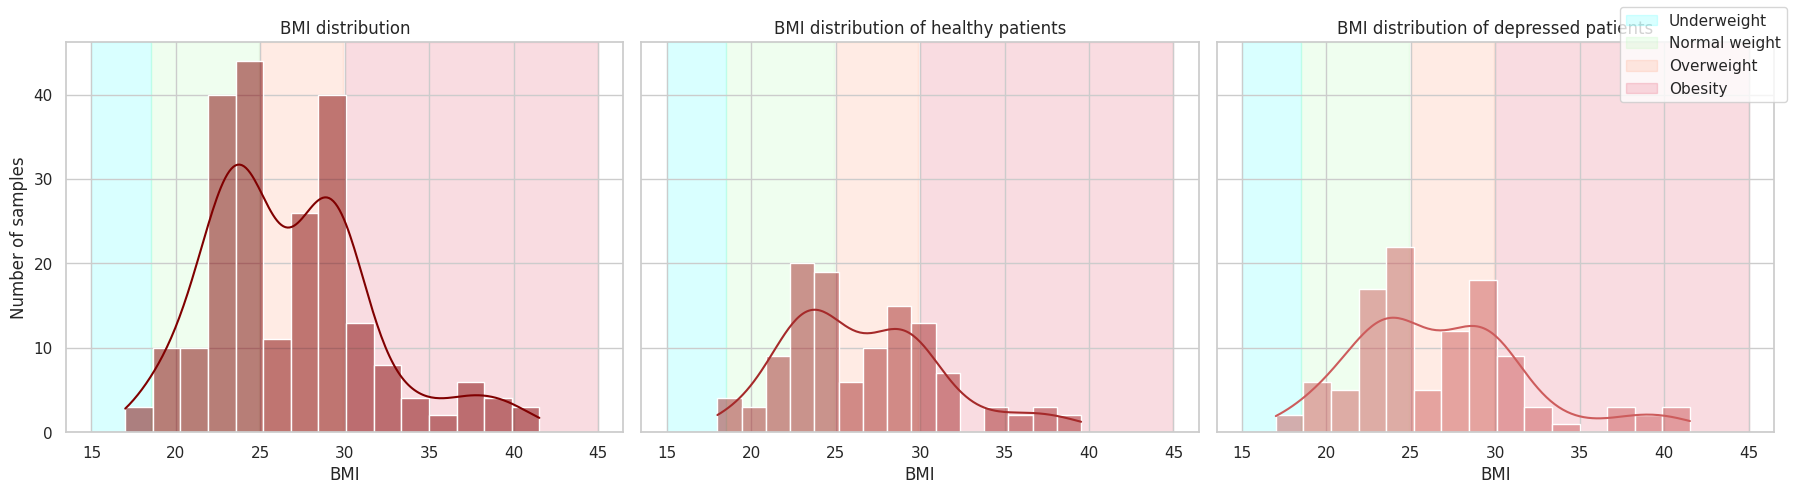

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets = [
    ("BMI distribution", metadata_filtered),
    ("BMI distribution of healthy patients", metadata_filtered[metadata_filtered["disease"] == "healthy"]),
    ("BMI distribution of depressed patients", metadata_filtered[metadata_filtered["disease"] == "depression"])
]

colors = ["maroon", "brown", "indianred"]

for ax, (title, data), color in zip(axes, datasets, colors):
    # --- shaded BMI ranges pod histogramem
    ax.axvspan(15, 18.5, color="cyan", alpha=0.15, label="Underweight", zorder=0)
    ax.axvspan(18.5, 24.9, color="palegreen", alpha=0.15, label="Normal weight", zorder=0)
    ax.axvspan(25, 29.9, color="coral", alpha=0.15, label="Overweight", zorder=0)
    ax.axvspan(30, 45, color="crimson", alpha=0.15, label="Obesity", zorder=0)

    sns.histplot(data["BMI"], bins=15, kde=True, color=color, ax=ax, zorder=1)

    ax.set_title(title)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Number of samples")

# wspólna legenda dla shaded ranges
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.show()


## Alpha diversity

#### Alpha diversity measures the within-sample microbial diversity, reflecting species richness and evenness in a single sample. Common metrics include:

1. Shannon Index – accounts for both richness and evenness.
2. Simpson Index – considers dominance by a few species.
3. Chao1 – estimates species richness, emphasizing rare species.
4. Number of features - calculates number of unique features in each sample.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from skbio.diversity.alpha import shannon
from scipy import stats
from scipy.spatial.distance import braycurtis, pdist, squareform
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio import DistanceMatrix
from scipy.stats import mannwhitneyu

In [43]:
metadata_filtered.index.is_unique

True

In [44]:
number_of_features_df_path   = pa_filtered.astype(bool).astype(int).sum(axis=1)
shannon_df_path              = pa_filtered.apply(lambda row: shannon(row), axis=1)

alpha_diversity_path         = pd.concat([number_of_features_df_path, shannon_df_path],axis=1)
alpha_diversity_path.columns = ['n_paths', 'shannon']

alpha_diversity_path         = pd.concat([metadata_filtered, alpha_diversity_path],axis=1)

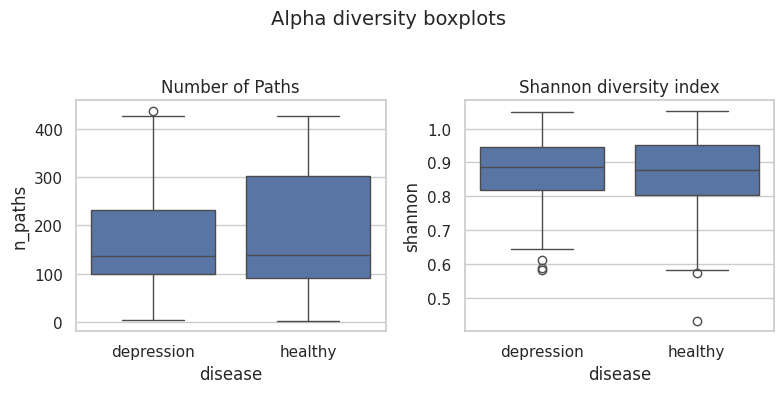

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'n_paths', 
           ax=axes[0])


sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'shannon', 
           ax=axes[1])

axes[0].set_title('Number of Paths')
axes[1].set_title('Shannon diversity index')

plt.suptitle('Alpha diversity boxplots \n', fontsize=14)
plt.tight_layout()

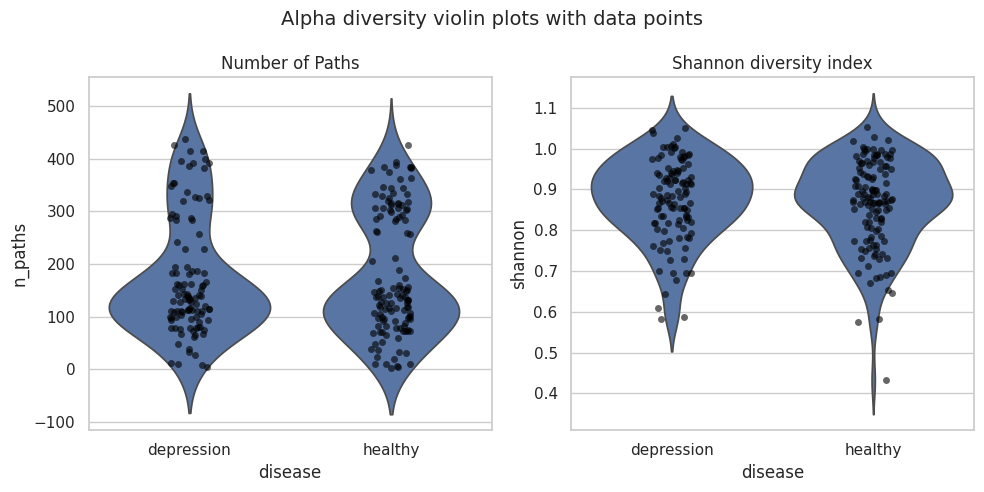

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(data=alpha_diversity_path, 
               x='disease', 
               y='n_paths', 
               inner=None,  
               ax=axes[0])
sns.stripplot(data=alpha_diversity_path, 
              x='disease', 
              y='n_paths', 
              color='black', 
              alpha=0.6, 
              jitter=True, 
              ax=axes[0])

sns.violinplot(data=alpha_diversity_path, 
               x='disease', 
               y='shannon', 
               inner=None, 
               ax=axes[1])
sns.stripplot(data=alpha_diversity_path, 
              x='disease', 
              y='shannon', 
              color='black', 
              alpha=0.6, 
              jitter=True, 
              ax=axes[1])

axes[0].set_title('Number of Paths')
axes[1].set_title('Shannon diversity index')

plt.suptitle('Alpha diversity violin plots with data points', fontsize=14)
plt.tight_layout()
plt.show()


In [47]:
control_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'healthy']
ibd_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'depression']

In [48]:
test_stat_path, pvalue_path = stats.kruskal(control_samples_path.n_paths, ibd_samples_path.n_paths)
print(f"P-value for Kruskal-Wallis test for number of features is = {pvalue_path:.2f}")

P-value for Kruskal-Wallis test for number of features is = 0.89


In [49]:
shannon_control = control_samples_path["shannon"].dropna()
shannon_ibd = ibd_samples_path["shannon"].dropna()

test_stat, pvalue = stats.kruskal(shannon_control, shannon_ibd)

print(f"P-value for Kruskal-Wallis test for Shannon diversity is = {pvalue:.5f}")


P-value for Kruskal-Wallis test for Shannon diversity is = 0.64135


## Beta diversity

### Beta diversity quantifies the between-sample microbial composition differences, showing how communities vary across samples. It is based on distance matrices and common metrics include:

1. Bray-Curtis Dissimilarity – considers species abundance.
2. Jaccard Index – based on presence/absence of species.
3. UniFrac – accounts for phylogenetic differences between communities (weighted or unweighted).

In [50]:
# usuwanie wierszy, które mają same zera

pa_filtered_clean = pa_filtered[~(pa_filtered == 0).all(axis=1)]

sum_rows_rarefied=pa_filtered_clean.sum(axis=1)

pa_filtered_rel = pa_filtered_clean.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pa_filtered_rel.sum(axis=1).sort_values()
 

NCBI_accession
ERR9814149     1.0
ERR9813884     1.0
ERR3473630     1.0
SRR16681849    1.0
ERR6995555     1.0
              ... 
ERR6997006     1.0
ERR6996126     1.0
ERR6995185     1.0
SRR15966658    1.0
ERR3473449     1.0
Length: 233, dtype: float64

In [51]:
dM_jaccard_path      = squareform(pdist(pa_filtered_rel.astype(bool).astype(int), 'jaccard'))
pcoa_jaccard_path    = pcoa(dM_jaccard_path).samples

In [52]:
dM_braycurtis_path   = squareform(pdist(pa_filtered_rel, 'braycurtis'))
pcoa_braycurtis_path = pcoa(dM_braycurtis_path).samples

In [53]:
dM_euclidean_path    = squareform(pdist(np.log(pa_filtered_rel+1e-3), 'euclidean'))
pcoa_euclidean_path  = pcoa(dM_euclidean_path).samples

## PCoA on beta diversity distance matrix

In [54]:
disease_dict_path = dict(zip(metadata.index, metadata.disease))

pcoa_jaccard_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_braycurtis_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_euclidean_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)

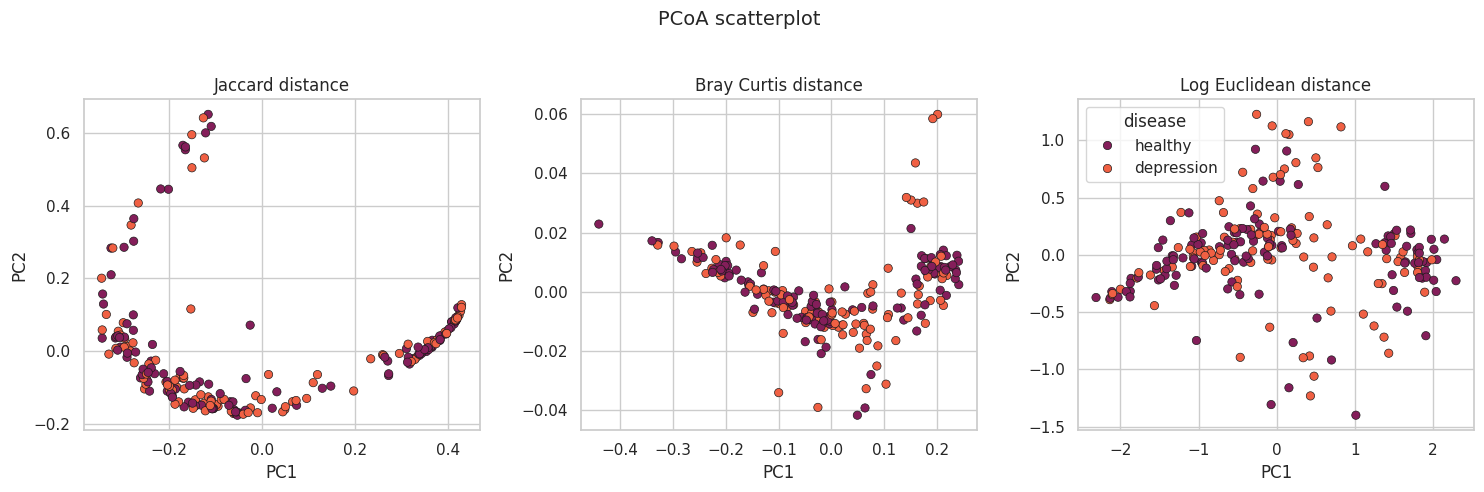

In [55]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(data=pcoa_jaccard_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'rocket',
                hue = 'disease',
                legend=False, 
                ax=axes[0])


sns.scatterplot(data=pcoa_braycurtis_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'rocket',
                hue = 'disease',
                legend=False, 
                ax=axes[1])

sns.scatterplot(data=pcoa_euclidean_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'rocket',
                hue = 'disease',
                ax=axes[2])

axes[0].set_title('Jaccard distance')
axes[1].set_title('Bray Curtis distance')
axes[2].set_title('Log Euclidean distance')

plt.suptitle('PCoA scatterplot \n', fontsize=14)

plt.tight_layout()

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# upewnij się, że pa_filtered ma NCBI_accession jako index
features_df = pa_filtered.copy()

# jeśli trzeba – usuń lub uzupełnij braki
features_df = features_df.dropna()  # lub .fillna(features_df.median(numeric_only=True))

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100  # w %
print(f"PC1 tłumaczy: {explained_var[0]:.2f}% wariancji")
print(f"PC2 tłumaczy: {explained_var[1]:.2f}% wariancji")


PC1 tłumaczy: 30.56% wariancji
PC2 tłumaczy: 13.44% wariancji


In [57]:
study_name_dict_path = dict(zip(metadata.index, metadata.study_name))

pcoa_jaccard_path['study_name'] = pa_filtered_rel.index.map(study_name_dict_path)
pcoa_braycurtis_path['study_name'] = pa_filtered_rel.index.map(study_name_dict_path)
pcoa_euclidean_path['study_name'] = pa_filtered_rel.index.map(study_name_dict_path)

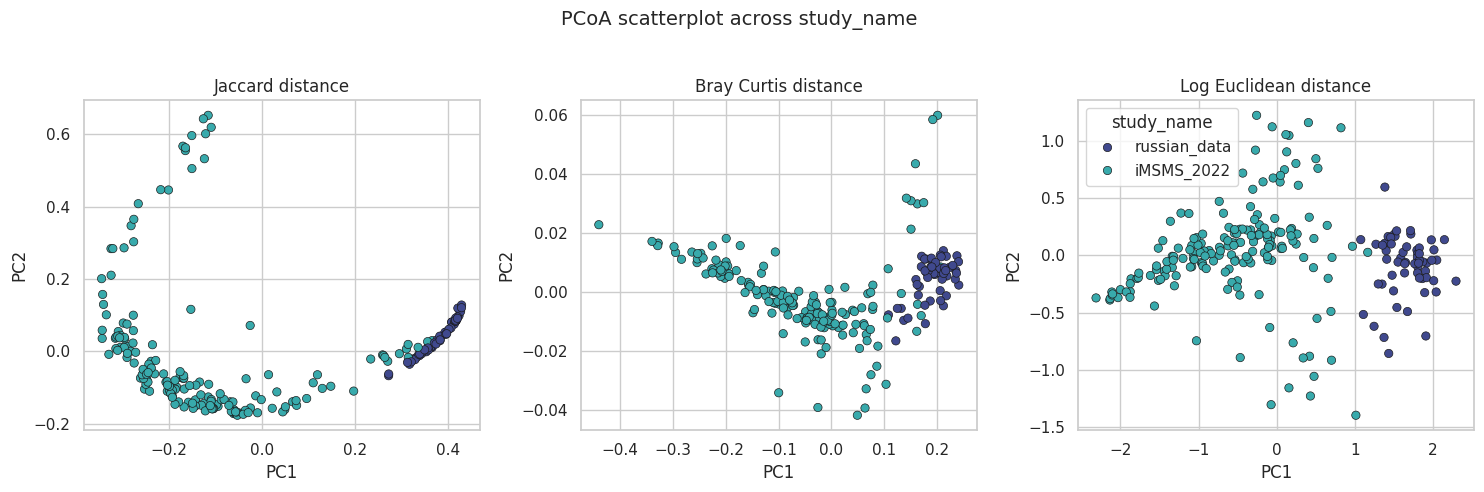

In [58]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(data=pcoa_jaccard_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'mako',
                hue = 'study_name',
                legend=False, 
                ax=axes[0])


sns.scatterplot(data=pcoa_braycurtis_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'mako',
                hue = 'study_name',
                legend=False, 
                ax=axes[1])

sns.scatterplot(data=pcoa_euclidean_path, 
                x = 'PC1', 
                y = 'PC2', 
                edgecolor=  'k',
                palette = 'mako',
                hue = 'study_name',
                ax=axes[2])

axes[0].set_title('Jaccard distance')
axes[1].set_title('Bray Curtis distance')
axes[2].set_title('Log Euclidean distance')

plt.suptitle('PCoA scatterplot across study_name \n', fontsize=14)

plt.tight_layout()

In [59]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix
from sklearn.utils import resample

def permdisp(data, metadata, group_col, metric="braycurtis", n_permutations=999, random_state=42):

    dist = pdist(data, metric=metric)
    dist_matrix = DistanceMatrix(squareform(dist), ids=data.index)
    
    groups = metadata.loc[data.index, group_col]
    centroids = {}
    dists_to_centroid = []
    labels = []
    
    for g in groups.unique():
        idx = np.where(groups == g)[0]
        sub_dm = dist_matrix.filter(data.index[idx], strict=False)
        centroid = sub_dm.data.mean(axis=0) 
        # odległości próbki -> centroid
        dist_to_centroid = sub_dm.data.mean(axis=1)
        dists_to_centroid.extend(dist_to_centroid)
        labels.extend([g] * len(dist_to_centroid))
    
    dists_to_centroid = np.array(dists_to_centroid)
    labels = np.array(labels)
    
    # ANOVA-like F
    grand_mean = dists_to_centroid.mean()
    ss_between = sum([len(dists_to_centroid[labels == g]) * 
                      (dists_to_centroid[labels == g].mean() - grand_mean) ** 2 
                      for g in np.unique(labels)])
    ss_within = sum([((dists_to_centroid[labels == g] - 
                       dists_to_centroid[labels == g].mean()) ** 2).sum() 
                     for g in np.unique(labels)])
    
    df_between = len(np.unique(labels)) - 1
    df_within = len(labels) - len(np.unique(labels))
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    F_stat = ms_between / ms_within
    
    # 
    rng = np.random.default_rng(random_state)
    perm_stats = []
    for _ in range(n_permutations):
        perm_labels = rng.permutation(labels)
        ss_between_perm = sum([len(dists_to_centroid[perm_labels == g]) * 
                               (dists_to_centroid[perm_labels == g].mean() - grand_mean) ** 2 
                               for g in np.unique(labels)])
        ms_between_perm = ss_between_perm / df_between
        F_perm = ms_between_perm / ms_within
        perm_stats.append(F_perm)
    
    p_value = (np.sum(np.array(perm_stats) >= F_stat) + 1) / (n_permutations + 1)
    
    result = {
        "method": "PERMDISP",
        "metric": metric,
        "test statistic": F_stat,
        "p-value": p_value,
        "n_perm": n_permutations
    }

    for k, v in result.items():
        print(f"{k}: {v}")


In [60]:
# domyślnie braycurtis
res_bray = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease")

print(" \n")

# jaccard
res_jaccard = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="jaccard")

print(" \n")

# euclidean
res_euc = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="euclidean")


method: PERMDISP
metric: braycurtis
test statistic: 13.199620449266677
p-value: 0.002
n_perm: 999
 

method: PERMDISP
metric: jaccard
test statistic: 4.8407851575353713e+26
p-value: 0.001
n_perm: 999
 

method: PERMDISP
metric: euclidean
test statistic: 12.768810108944178
p-value: 0.002
n_perm: 999


In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# upewnij się, że pa_filtered ma NCBI_accession jako index
features_df = pa_filtered_rel.copy()

# jeśli trzeba – usuń lub uzupełnij braki
features_df = features_df.dropna()  # lub .fillna(features_df.median(numeric_only=True))

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100  # w %
print(f"PC1 tłumaczy: {explained_var[0]:.2f}% wariancji")
print(f"PC2 tłumaczy: {explained_var[1]:.2f}% wariancji")


PC1 tłumaczy: 30.56% wariancji
PC2 tłumaczy: 13.44% wariancji


## PERMANOVA

Test for significant differences between groups using PERMANOVA.

Permutational Multivariate Analysis of Variance (PERMANOVA) is a non-parametric method that tests whether two or more groups of objects (e.g., samples) are significantly different based on a categorical factor. It is conceptually similar to ANOVA except that it operates on a distance matrix, which allows for multivariate analysis. PERMANOVA computes a pseudo-F statistic.

Statistical significance is assessed via a permutation test. The assignment of objects to groups (grouping) is randomly permuted a number of times (controlled via permutations). A pseudo-F statistic is computed for each permutation and the p-value is the proportion of permuted pseudo-F statisics that are equal to or greater than the original (unpermuted) pseudo-F statistic.



In [62]:
grouping_variable_path = pa_filtered_rel.index.map(disease_dict_path)

In [63]:
dM_jaccard_df_path = pd.DataFrame(dM_jaccard_path)

dm_path = DistanceMatrix(dM_jaccard_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     233
number of groups                  2
test statistic             0.992371
p-value                       0.351
number of permutations          999
Name: PERMANOVA results, dtype: object

In [64]:
dM_braycurtis_df_path = pd.DataFrame(dM_braycurtis_path)

dm_path = DistanceMatrix(dM_braycurtis_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     233
number of groups                  2
test statistic             0.014782
p-value                        0.94
number of permutations          999
Name: PERMANOVA results, dtype: object

In [65]:
dM_euclidean_df_path = pd.DataFrame(dM_euclidean_path)

dm_path = DistanceMatrix(dM_euclidean_df_path)
permanova(dm_path, grouping_variable_path)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     233
number of groups                  2
test statistic             0.710352
p-value                       0.466
number of permutations          999
Name: PERMANOVA results, dtype: object

### Differential abundance - U Mann Whitney test

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.



In [66]:
pa_filtered_rel.loc[:, 'disease'] = grouping_variable_path

pathway = pa_filtered_rel.columns[:-1]  

results = []

for path in pathway:
    
    control_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'depression', path]
    ibd_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'healthy', path]

    control_samples_log_path = np.log(control_samples_path+1e-3)
    ibd_samples_log_path = np.log(ibd_samples_path+1e-3)
    
    stat_path, pvalue_path = mannwhitneyu(control_samples_log_path, ibd_samples_log_path)
    results.append({'pathway': path, 'pvalue': pvalue_path, 'stat': stat_path})

results_df_path = pd.DataFrame(results)

# Adjust pvalues
results_df_path['pvalue_adj'] = stats.false_discovery_control(results_df_path.pvalue)
results_df = np.round(results_df_path, 5)

In [67]:
results_df[results_df['pvalue_adj'] < 0.05].sort_values(by = 'pvalue_adj')

,pathway,pvalue,stat,pvalue_adj


In [68]:
filtered_results = results_df[results_df['pvalue_adj'] < 0.1]

min_pathway = filtered_results.loc[filtered_results['stat'].idxmin(), 'pathway']
max_pathway = filtered_results.loc[filtered_results['stat'].idxmax(), 'pathway']

print("Ścieżka z najniższą wartością stat:", min_pathway)
print("Ścieżka z najwyższą wartością stat:", max_pathway)


ValueError: attempt to get argmin of an empty sequence

In [69]:
# pip install shap

In [70]:
# pip install --upgrade numba llvmlite


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import shap
import matplotlib.pyplot as plt

# ====== Dane ======
X = pa_filtered.copy()
# y = metadata_filtered["disease"].copy()
y = metadata_filtered["disease"].map({"healthy": 1, "depression": 0})


# zakoduj y (jeśli stringi)
le = LabelEncoder()
y = le.fit_transform(y)  # 0/1

# skalowanie dla modeli liniowych i kmeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== Train/test split ======
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [80]:
model = LogisticRegression().fit(X, y)
print(model.classes_)


[0 1]


In [81]:
print(pd.Series(y).value_counts())

1    125
0    108
Name: count, dtype: int64


Czyli 0 to osoby chore i 1 to osoby zdrowe

## ML

Feature selection:
LASSO - wybór minimalnego zestawu metadanych dobrze wyjaśniającego wynik zdrowie/choroba.

Regularized regression (Elastic Net / Sparse PLS-DA): wyłapuje kombinacje metadane+pathways, które najlepiej różnicują grupy.

In [ ]:
lasso = LogisticRegression(
    penalty="l1", solver="saga", C=1.0, max_iter=5000, random_state=42
)
lasso.fit(X_train, y_train)

coef_lasso = pd.Series(lasso.coef_[0], index=X.columns)
print("LASSO non-zero features:")
print(coef_lasso[coef_lasso != 0].sort_values(ascending=False))


LASSO - wybrane cechy (niezerowe):
COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis                                                0.916154
PWY-7197: pyrimidine deoxyribonucleotide phosphorylation                                                          0.828478
POLYAMSYN-PWY: superpathway of polyamine biosynthesis I                                                           0.815061
PWY-5676: acetyl-CoA fermentation to butanoate II                                                                 0.808941
PYRIDOXSYN-PWY: pyridoxal 5'-phosphate biosynthesis I                                                             0.779662
                                                                                                                    ...   
PWY66-409: superpathway of purine nucleotide salvage                                                             -0.616131
PWY-6471: peptidoglycan biosynthesis IV (Enterococcus faecium)                                          

In [ ]:
enet = LogisticRegression(
    penalty="elasticnet", solver="saga", l1_ratio=0.5, C=1.0, max_iter=5000, random_state=42
)
enet.fit(X_train, y_train)

coef_enet = pd.Series(enet.coef_[0], index=X.columns)
print("Elastic Net - feature importance:")
print(coef_enet.sort_values(ascending=False).head(15))


Elastic Net - ważność cech:
PWY-7197: pyrimidine deoxyribonucleotide phosphorylation                  0.898647
PYRIDOXSYN-PWY: pyridoxal 5'-phosphate biosynthesis I                     0.734384
COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis        0.691916
P164-PWY: purine nucleobases degradation I (anaerobic)                    0.659651
PWY-5676: acetyl-CoA fermentation to butanoate II                         0.622513
GLUDEG-I-PWY: GABA shunt                                                  0.593163
POLYAMSYN-PWY: superpathway of polyamine biosynthesis I                   0.576485
PWY-5505: L-glutamate and L-glutamine biosynthesis                        0.569479
GOLPDLCAT-PWY: superpathway of glycerol degradation to 1,3-propanediol    0.496966
PWY1ZNC-1: assimilatory sulfate reduction IV                              0.489967
PWY66-429: fatty acid biosynthesis initiation (mitochondria)              0.463055
PWY-5154: L-arginine biosynthesis III (via N-acetyl-L-citru

AUC-ROC: 1.000
Najważniejsze cechy w Random Forest:
UNINTEGRATED                                                            0.013656
UNMAPPED                                                                0.013143
PWY-6700: queuosine biosynthesis I (de novo)                            0.009865
PWY-6703: preQ0 biosynthesis                                            0.009330
NONOXIPENT-PWY: pentose phosphate pathway (non-oxidative branch) I      0.009124
PWY-5695: inosine 5'-phosphate degradation                              0.009109
GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose)         0.008369
PWY-8187: L-arginine degradation XIII (reductive Stickland reaction)    0.008024
PWY-7977: L-methionine biosynthesis IV                                  0.007600
PWY-7208: superpathway of pyrimidine nucleobases salvage                0.007486
PWY-6609: adenine and adenosine salvage III                             0.007399
COA-PWY: coenzyme A biosynthesis I (prokaryotic)         

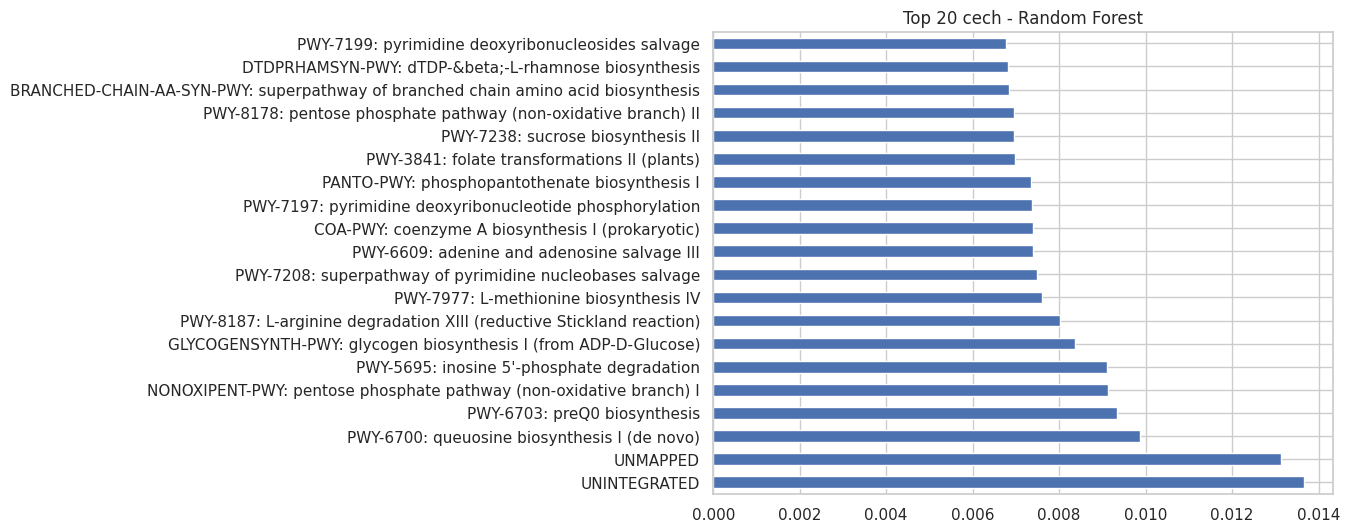

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import shap
import matplotlib.pyplot as plt
import pandas as pd

# ===== Dane =====
# X = macierz cech (pathways + metadata)
# y = etykiety (0 = zdrowy, 1 = chory)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500, 
    random_state=42, 
    class_weight="balanced"
)
rf.fit(X, y)

# AUC-ROC
y_pred_proba = rf.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred_proba)
print(f"AUC-ROC: {auc:.3f}")

# Feature importance (z modelu)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Najważniejsze cechy w Random Forest:")
print(importances.head(15))

# Wykres ważności cech
importances.head(20).plot(kind="barh", figsize=(8,6))
plt.title("Top 20 cech - Random Forest")
plt.show()


In [77]:
import pandas as pd

# Healthy = 1, Depression = 0
y = metadata_filtered["disease"].map({"healthy": 1, "depression": 0})

# Zmienne objaśniające (cechy)
# tutaj np. same pathways
X = pa_filtered.loc[y.index]

# albo pathways + metadane (bez disease)
X = pd.concat([pa_filtered.loc[y.index], 
               metadata_filtered.drop(columns=["disease"])], axis=1)


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Model Random Forest
rf = RandomForestClassifier(
    n_estimators=500, 
    random_state=42, 
    class_weight="balanced"
)
rf.fit(X, y)

# Predykcje prawdopodobieństwa
y_pred_proba = rf.predict_proba(X)[:, 1]

# AUC-ROC
auc = roc_auc_score(y, y_pred_proba)
print(f"AUC-ROC: {auc:.3f}")

# Ważność cech
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\nNajważniejsze cechy (top 15):")
print(importances.head(15))

# Wykres ważności
plt.figure(figsize=(8,6))
importances.head(20).plot(kind="barh")
plt.title("Top 20 cech - Random Forest")
plt.xlabel("Feature importance")
plt.gca().invert_yaxis()
plt.show()


ValueError: could not convert string to float: 'iMSMS_2022'